In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np

cols = [i for i in range(6,31)]
userows = [1, 72, *range(173, 700, 105), 802, 894, *range(995, 1310, 105), *range(1305, 1940, 105), 
           *range(2039, 3315, 105), 3404, 3509, 3607, *range(3712, 4658, 105), *range(4761, 6000, 105)]
full_df = pd.read_excel("/Users/silas/Documents/College/Spring 2022/"
                   "Anthro Homework Research/Homework 4/State Pollution.xlsx", 
                   skiprows = lambda x : x not in userows, usecols = [1, 3, 4] + cols)

pd.set_option('display.max_rows', 10)

full_df

,State,Tier 1 Description,Pollutant,emissions96,emissions97,...,emissions16,emissions17,emissions18,emissions19,emissions20
0,AL,HIGHWAY VEHICLES,CO,1674.01395,1602.25032,...,588.545740,556.784903,525.500020,494.215137,462.930254
1,AK,HIGHWAY VEHICLES,CO,173.25628,173.86574,...,60.100755,67.426567,67.426567,67.426567,67.426567
2,AZ,HIGHWAY VEHICLES,CO,1084.92615,1065.99933,...,468.667272,487.903594,459.104612,430.305631,401.506650
3,AR,HIGHWAY VEHICLES,CO,913.63369,883.78506,...,262.368859,247.804146,235.058315,222.312484,209.566652
4,CA,HIGHWAY VEHICLES,CO,6890.96906,6547.79103,...,793.436556,721.087946,679.477928,637.867910,596.257893
...,...,...,...,...,...,...,...,...,...,...,...
46,VA,HIGHWAY VEHICLES,CO,2220.05699,2121.15444,...,578.911416,604.590429,563.275939,521.961448,480.646957
47,WA,HIGHWAY VEHICLES,CO,1575.53651,1523.81512,...,522.044247,537.748345,501.634508,465.520670,429.406833
48,WV,HIGHWAY VEHICLES,CO,618.75519,598.23481,...,139.451673,150.103277,138.276107,126.448938,114.621768
49,WI,HIGHWAY VEHICLES,CO,1872.31714,1783.42817,...,391.798117,395.637088,370.937912,346.238737,321.539561


In [60]:
#df.groupby("emissions96").plot(x="State", y="emissions96", linestyle='--', marker='o', color='b')
pd.set_option('display.max_columns', 10)
full_df.T

,0,1,2,3,4,...,46,47,48,49,50
State,AL,AK,AZ,AR,CA,...,VA,WA,WV,WI,WY
Tier 1 Description,HIGHWAY VEHICLES,HIGHWAY VEHICLES,HIGHWAY VEHICLES,HIGHWAY VEHICLES,HIGHWAY VEHICLES,...,HIGHWAY VEHICLES,HIGHWAY VEHICLES,HIGHWAY VEHICLES,HIGHWAY VEHICLES,HIGHWAY VEHICLES
Pollutant,CO,CO,CO,CO,CO,...,CO,CO,CO,CO,CO
emissions96,1674.01395,173.25628,1084.92615,913.63369,6890.96906,...,2220.05699,1575.53651,618.75519,1872.31714,291.14133
emissions97,1602.25032,173.86574,1065.99933,883.78506,6547.79103,...,2121.15444,1523.81512,598.23481,1783.42817,276.702
...,...,...,...,...,...,...,...,...,...,...,...
emissions16,588.54574,60.100755,468.667272,262.368859,793.436556,...,578.911416,522.044247,139.451673,391.798117,74.799914
emissions17,556.784903,67.426567,487.903594,247.804146,721.087946,...,604.590429,537.748345,150.103277,395.637088,75.986563
emissions18,525.50002,67.426567,459.104612,235.058315,679.477928,...,563.275939,501.634508,138.276107,370.937912,71.316935
emissions19,494.215137,67.426567,430.305631,222.312484,637.86791,...,521.961448,465.52067,126.448938,346.238737,66.647307


In [61]:
states = pd.ExcelFile("/Users/silas/Documents/College/Spring 2022/Anthro Homework Research/Homework 4/Poll_2.xlsx")
df_mid = pd.read_excel(states, 'Sheet2', usecols = [0, 1, 2])
#df_mid2 = df_mid.rename(columns={"CO Pollution", "Year", "Area"}, inplace=True)
df_mid

,CO in 1000s of tons,Year,State
0,3011.916060,1996,IL
1,2930.027810,1997,IL
2,2855.969220,1998,IL
3,2680.827400,1999,IL
4,2533.310590,2000,IL
...,...,...,...
320,391.798117,2016,WI
321,395.637088,2017,WI
322,370.937912,2018,WI
323,346.238737,2019,WI


State
IA    AxesSubplot(0.125,0.125;0.775x0.755)
ID    AxesSubplot(0.125,0.125;0.775x0.755)
IL    AxesSubplot(0.125,0.125;0.775x0.755)
IN    AxesSubplot(0.125,0.125;0.775x0.755)
KS    AxesSubplot(0.125,0.125;0.775x0.755)
                      ...                 
ND    AxesSubplot(0.125,0.125;0.775x0.755)
NE    AxesSubplot(0.125,0.125;0.775x0.755)
OH    AxesSubplot(0.125,0.125;0.775x0.755)
SD    AxesSubplot(0.125,0.125;0.775x0.755)
WI    AxesSubplot(0.125,0.125;0.775x0.755)
Length: 13, dtype: object

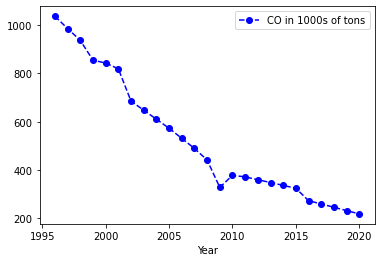

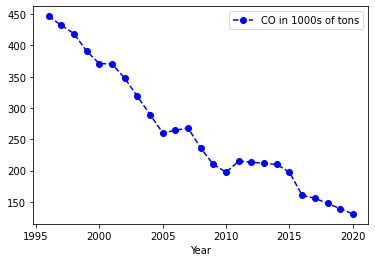

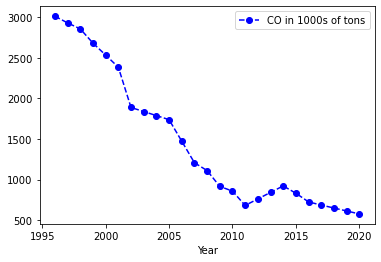

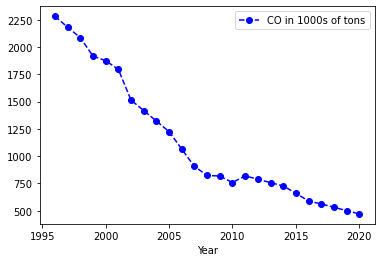

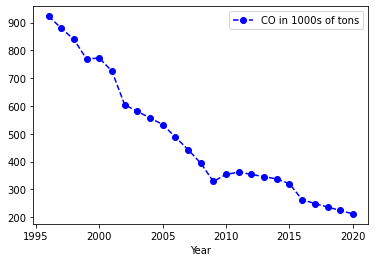

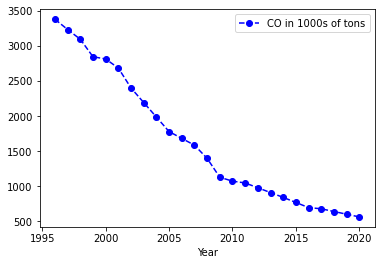

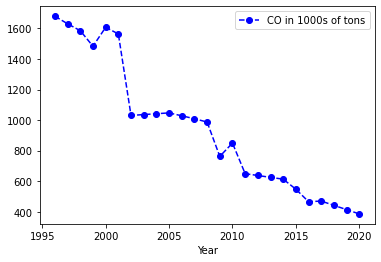

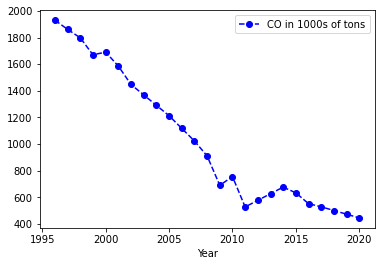

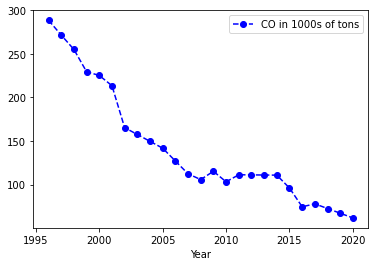

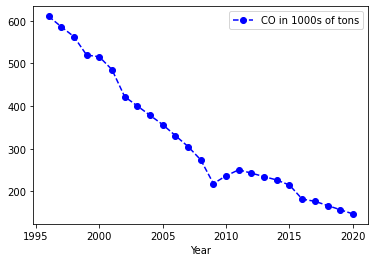

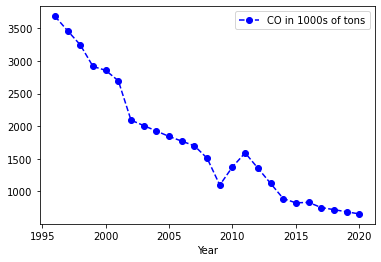

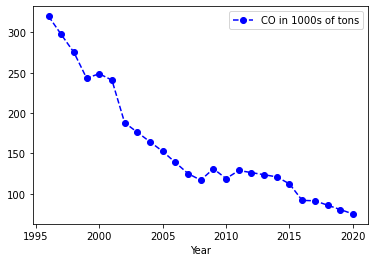

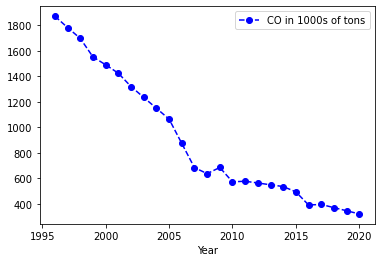

In [62]:
df_mid.groupby("State").plot(x="Year", y="CO in 1000s of tons", linestyle='--', marker='o', color='b')

([<matplotlib.axis.XTick at 0x7f8f335b96d0>,
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015')])

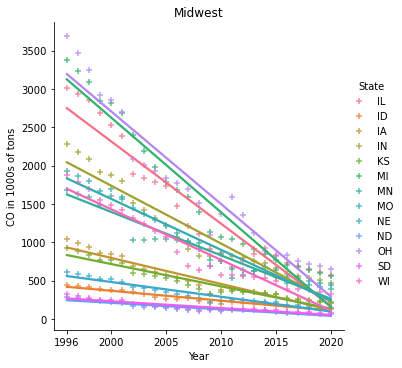

In [63]:
sns.lmplot(x="Year",
           y="CO in 1000s of tons",
           hue ="State",
           markers="+", ci=None,
           data=df_mid).set(title='Midwest')
plt.xticks(ticks=[1996,2000,2005,2010,2015,2020])

In [64]:
df_w = pd.read_excel(states, 'Sheet3', usecols = [0,1,2])
df_w

,CO in 1000s of tons,Year,State
0,173.256280,1996,AK
1,173.865740,1997,AK
2,175.120390,1998,AK
3,169.920040,1999,AK
4,154.916970,2000,AK
...,...,...,...
295,74.799914,2016,WY
296,75.986563,2017,WY
297,71.316935,2018,WY
298,66.647307,2019,WY


State
AK    AxesSubplot(0.125,0.125;0.775x0.755)
AZ    AxesSubplot(0.125,0.125;0.775x0.755)
CA    AxesSubplot(0.125,0.125;0.775x0.755)
CO    AxesSubplot(0.125,0.125;0.775x0.755)
HI    AxesSubplot(0.125,0.125;0.775x0.755)
                      ...                 
NV    AxesSubplot(0.125,0.125;0.775x0.755)
OR    AxesSubplot(0.125,0.125;0.775x0.755)
UT    AxesSubplot(0.125,0.125;0.775x0.755)
WA    AxesSubplot(0.125,0.125;0.775x0.755)
WY    AxesSubplot(0.125,0.125;0.775x0.755)
Length: 12, dtype: object

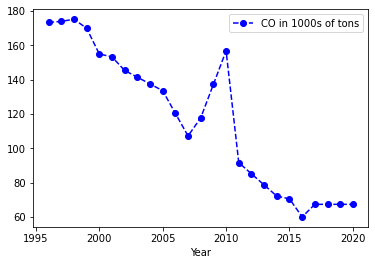

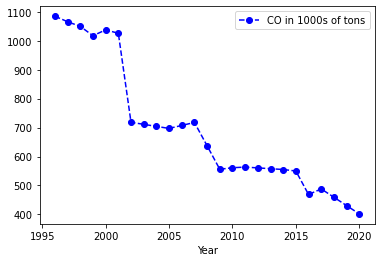

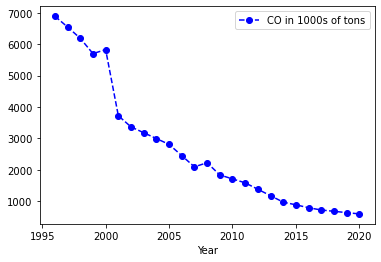

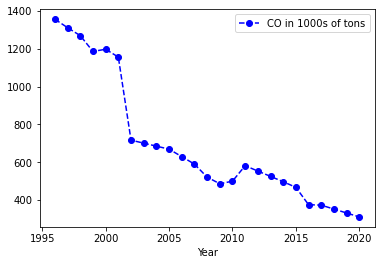

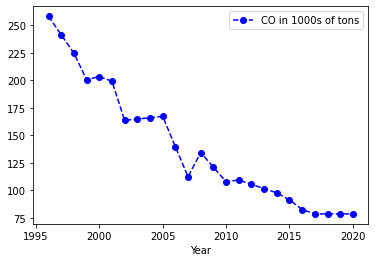

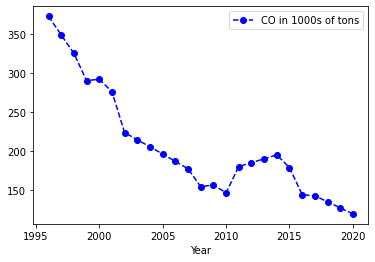

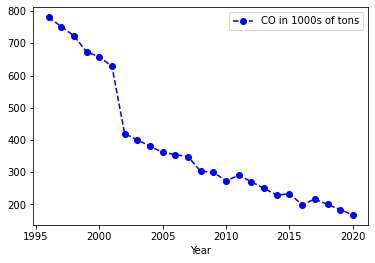

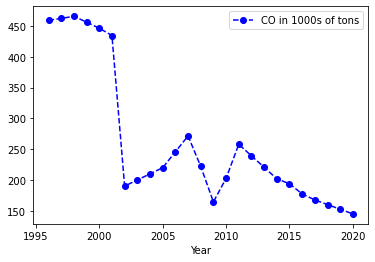

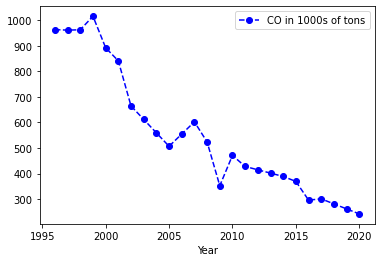

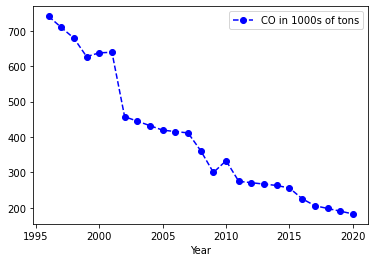

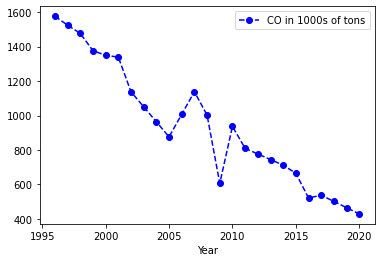

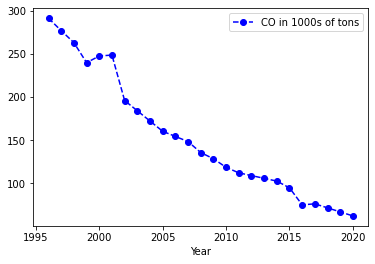

In [65]:
df_w.groupby("State").plot(x="Year", y="CO in 1000s of tons", linestyle='--', marker='o', color='b')

([<matplotlib.axis.XTick at 0x7f8f32da8040>,
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015')])

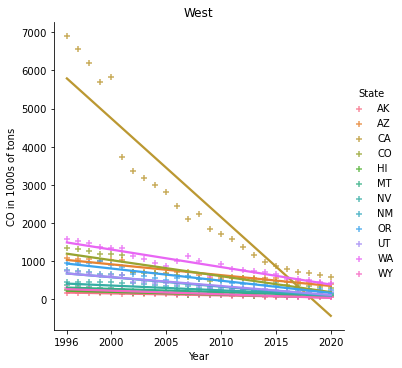

In [66]:
sns.lmplot(x="Year",
           y="CO in 1000s of tons",
           hue ="State",
           markers="+", ci=None,
           data=df_w).set(title='West')
plt.xticks(ticks=[1996,2000,2005,2010,2015,2020])

State
AL    AxesSubplot(0.125,0.125;0.775x0.755)
AR    AxesSubplot(0.125,0.125;0.775x0.755)
DC    AxesSubplot(0.125,0.125;0.775x0.755)
DE    AxesSubplot(0.125,0.125;0.775x0.755)
FL    AxesSubplot(0.125,0.125;0.775x0.755)
                      ...                 
SC    AxesSubplot(0.125,0.125;0.775x0.755)
TN    AxesSubplot(0.125,0.125;0.775x0.755)
TX    AxesSubplot(0.125,0.125;0.775x0.755)
VA    AxesSubplot(0.125,0.125;0.775x0.755)
WV    AxesSubplot(0.125,0.125;0.775x0.755)
Length: 16, dtype: object

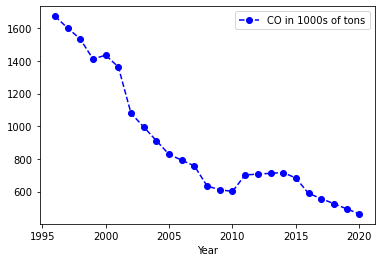

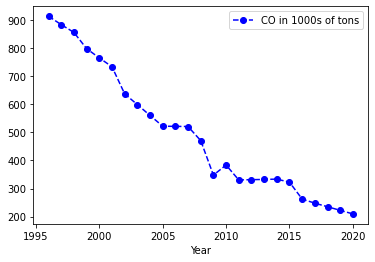

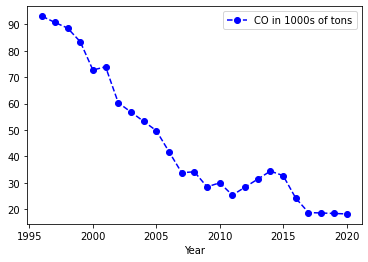

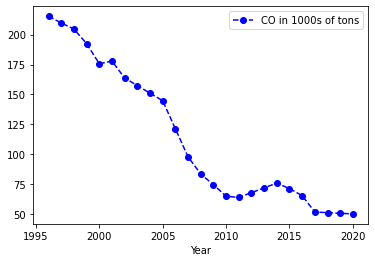

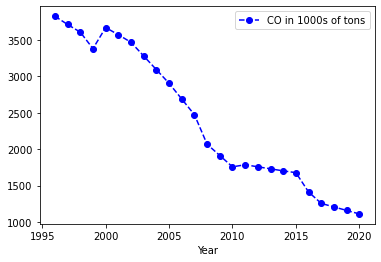

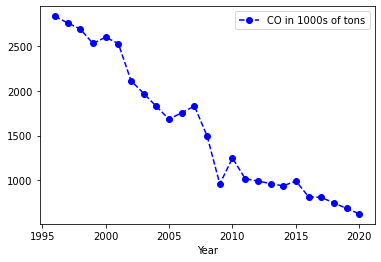

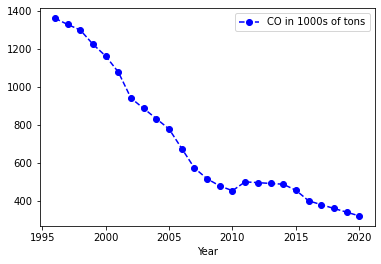

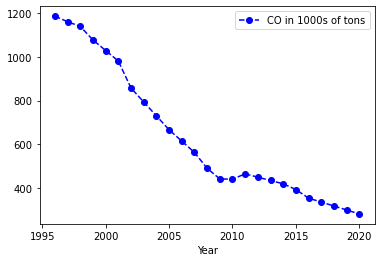

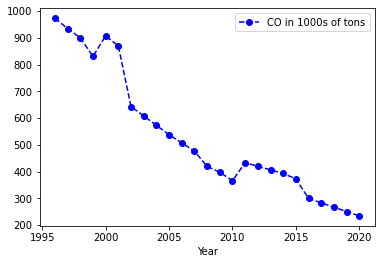

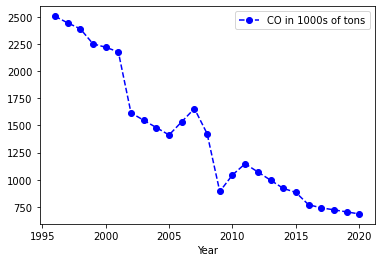

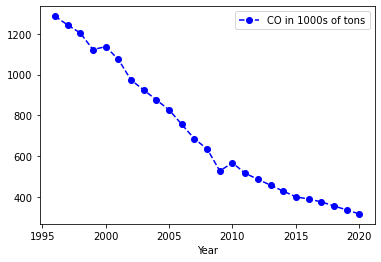

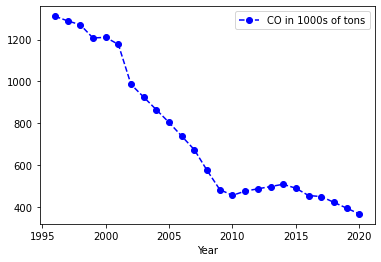

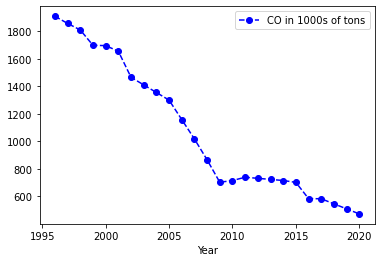

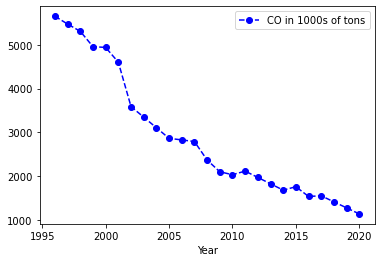

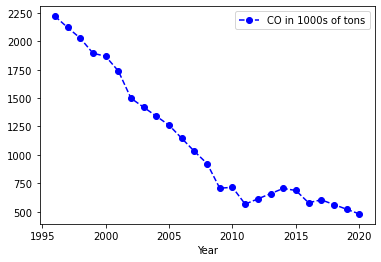

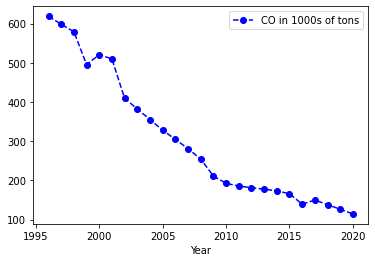

In [67]:
df_s = pd.read_excel(states, 'Sheet4', usecols=[0,1,2])
df_s.groupby("State").plot(x="Year", y="CO in 1000s of tons", linestyle='--', marker='o', color='b')

([<matplotlib.axis.XTick at 0x7f8f026c15b0>,
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015')])

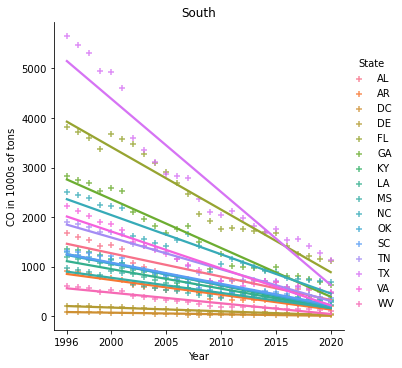

In [68]:
sns.lmplot(x="Year",
           y="CO in 1000s of tons",
           hue ="State",
           markers="+", ci=None,
           data=df_s).set(title='South')
plt.xticks(ticks=[1996,2000,2005,2010,2015,2020])

State
CT    AxesSubplot(0.125,0.125;0.775x0.755)
MA    AxesSubplot(0.125,0.125;0.775x0.755)
MD    AxesSubplot(0.125,0.125;0.775x0.755)
ME    AxesSubplot(0.125,0.125;0.775x0.755)
NH    AxesSubplot(0.125,0.125;0.775x0.755)
NJ    AxesSubplot(0.125,0.125;0.775x0.755)
NY    AxesSubplot(0.125,0.125;0.775x0.755)
PA    AxesSubplot(0.125,0.125;0.775x0.755)
RI    AxesSubplot(0.125,0.125;0.775x0.755)
VT    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

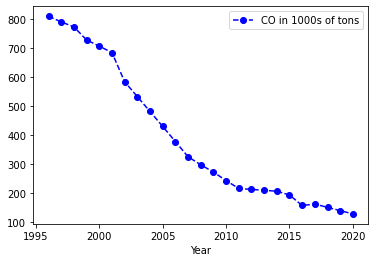

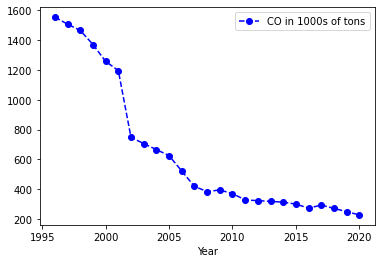

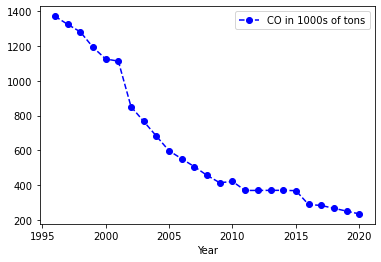

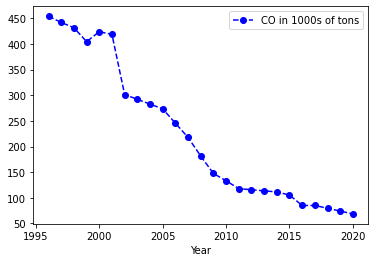

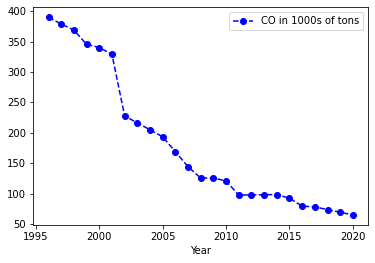

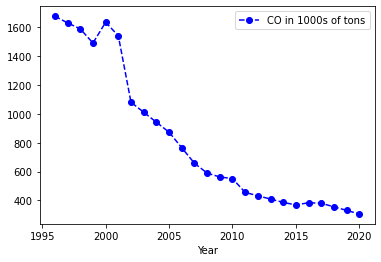

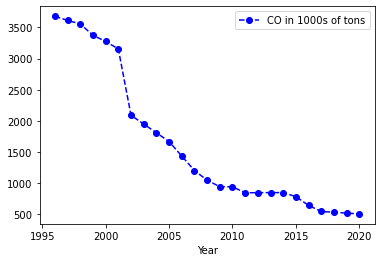

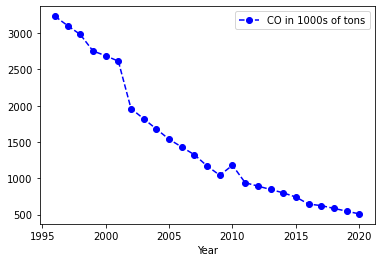

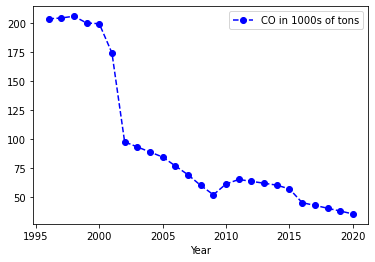

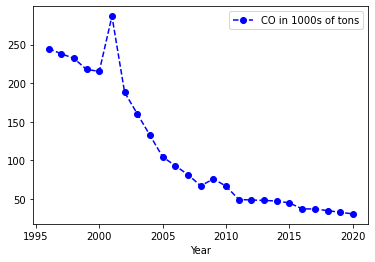

In [69]:
df_ne = pd.read_excel(states, 'Sheet5', usecols = [0,1,2])
df_ne.groupby("State").plot(x="Year", y="CO in 1000s of tons", linestyle='--', marker='o', color='b')

([<matplotlib.axis.XTick at 0x7f8f2014c130>,
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015')])

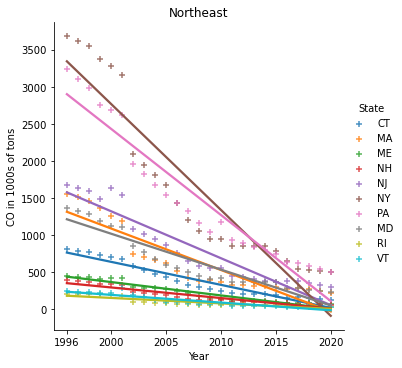

In [70]:
sns.lmplot(x="Year",
           y="CO in 1000s of tons",
           hue ="State",
           markers="+", ci=None,
           data=df_ne).set(title='Northeast')
plt.xticks(ticks=[1996,2000,2005,2010,2015,2020])

([<matplotlib.axis.XTick at 0x7f8f13a4b850>,
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015')])

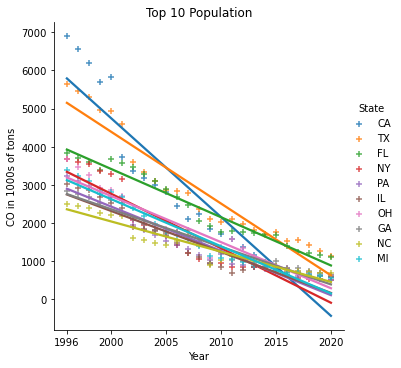

In [71]:
df_pop = pd.read_excel(states, 'Sheet7')
g_pop = sns.lmplot(x="Year",
           y="CO in 1000s of tons",  
           hue="State",
           markers="+", ci=None,
           data=df_pop).set(title='Top 10 Population')
plt.xticks(ticks=[1996,2000,2005,2010,2015,2020])

([<matplotlib.axis.XTick at 0x7f8f3457ffa0>,
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015')])

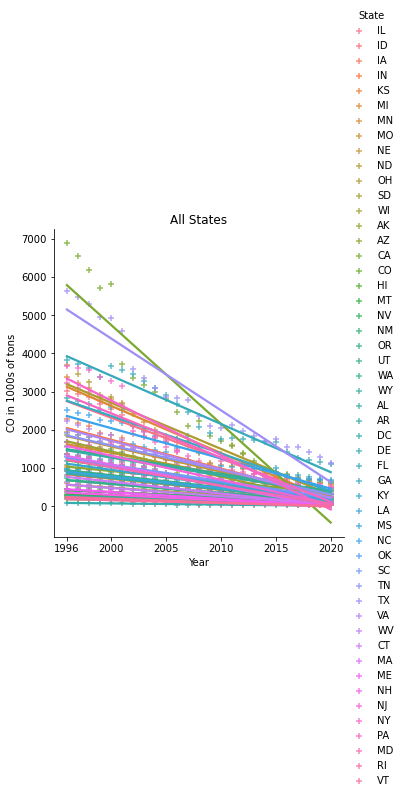

In [72]:
df_all = pd.read_excel(states, 'Sheet6')
g_all = sns.lmplot(x="Year",
           y="CO in 1000s of tons",  
           hue="State",
           markers="+", ci=None,
           data=df_all).set(title='All States')
plt.xticks(ticks=[1996,2000,2005,2010,2015,2020])

In [85]:
df_all.rename(columns={'CO in 1000s of tons' : 'CO'}, inplace=True)
df_all['log_CO'] = np.log(df_all['CO'])
df_all['start_pt'] = df_all['Year'] - 1995
df_all

,CO,Year,State,Unnamed: 3,All States,Unnamed: 5,log_CO,start_pt
0,3011.916060,1996,IL,NaN,AK,NaN,8.010332,1
1,2930.027810,1997,IL,NaN,AL,50.0,7.982767,2
2,2855.969220,1998,IL,NaN,AR,NaN,7.957167,3
3,2680.827400,1999,IL,NaN,AZ,NaN,7.893881,4
4,2533.310590,2000,IL,NaN,CA,NaN,7.837282,5
...,...,...,...,...,...,...,...,...
1270,36.886485,2016,VT,NaN,NaN,NaN,3.607845,21
1271,36.762372,2017,VT,NaN,NaN,NaN,3.604475,22
1272,34.622360,2018,VT,NaN,NaN,NaN,3.544500,23
1273,32.482347,2019,VT,NaN,NaN,NaN,3.480697,24


In [87]:
fit = ols('log_CO ~ start_pt', data=df_all).fit()

print(fit.summary())
print(fit.params)

                            OLS Regression Results                            
Dep. Variable:                 log_CO   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.20e-62
Time:                        14:33:13   Log-Likelihood:                -1768.0
No. Observations:                1275   AIC:                             3540.
Df Residuals:                    1273   BIC:                             3550.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0070      0.056    125.245      0.0